<a href="https://colab.research.google.com/github/Rodrigolsantoswk/Python-Codes/blob/main/notebookCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# !apt-get -qq install -y libarchive-dev && pip install -U unidecode
!pip install -U unidecode
!pip install patool
import patoolib

import os
import smtplib
import email.message as emassege

from zipfile import ZipFile

from unidecode import unidecode
import sys

import seaborn as sns

import pandas as pd
from openpyxl import load_workbook
import openpyxl

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import requests

In [ ]:
import rarfile
# Armengue vindo direto da bahia... Esse link foi o response do botão do site, não tem link direto. Ou seja, não é possível pegar os arquivos mais recentes. (Pelo menos eu não sei)
response_covid = requests.get('https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/3c894f7c23c1bd5129284fdd6a065872_HIST_PAINEL_COVIDBR_12jul2022.rar')

with open('C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\teste.rar', 'wb') as f:
    f.write(response_covid.content)


os.listdir('C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\')
files = os.listdir('C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\files')

for i in files:
    os.remove('C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\files\\'+i)

#Isso aqui descompacta os arquivos dentro de uma outra pasta chamada "Files"
patoolib.extract_archive('C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\teste.rar', outdir = 'C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\files')

patool: Extracting C:\Users\limas\OneDrive\Área de Trabalho\Pastas\IFBA\IA\data\teste.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\limas\OneDrive\Área de Trabalho\Pastas\IFBA\IA\data\teste.rar"
patool:     with cwd="C:\Users\limas\OneDrive\Área de Trabalho\Pastas\IFBA\IA\data\files"
patool: ... C:\Users\limas\OneDrive\Área de Trabalho\Pastas\IFBA\IA\data\teste.rar extracted to `C:\Users\limas\OneDrive\Área de Trabalho\Pastas\IFBA\IA\data\files'.


'C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\files'

In [ ]:
files = os.listdir('C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\files')
ListadeDfs = []
for i in files:
    df = pd.read_csv('C:\\Users\\limas\\OneDrive\\Área de Trabalho\\Pastas\\IFBA\\IA\\data\\files\\'+i, delimiter=';')
    ListadeDfs.append(df)

print(ListadeDfs)

[              regiao estado municipio  coduf    codmun  codRegiaoSaude  \
0             Brasil    NaN       NaN     76       NaN             NaN   
1             Brasil    NaN       NaN     76       NaN             NaN   
2             Brasil    NaN       NaN     76       NaN             NaN   
3             Brasil    NaN       NaN     76       NaN             NaN   
4             Brasil    NaN       NaN     76       NaN             NaN   
...              ...    ...       ...    ...       ...             ...   
714476  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
714477  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
714478  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
714479  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   
714480  Centro-Oeste     DF  Brasília     53  530010.0         53001.0   

         nomeRegiaoSaude        data  semanaEpi  populacaoTCU2019  \
0                    NaN  2020-02-25     

In [ ]:
for i in ListadeDfs:
    i.reset_index(drop=True, inplace=True)

In [ ]:
# dfg = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)
dfg = pd.concat(ListadeDfs, axis=0, ignore_index=True)
dfg.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


In [ ]:
dfg.dtypes

regiao                     object
estado                     object
municipio                  object
coduf                       int64
codmun                    float64
codRegiaoSaude            float64
nomeRegiaoSaude            object
data                       object
semanaEpi                   int64
populacaoTCU2019          float64
casosAcumulado            float64
casosNovos                  int64
obitosAcumulado             int64
obitosNovos                 int64
Recuperadosnovos          float64
emAcompanhamentoNovos     float64
interior/metropolitana    float64
dtype: object

In [ ]:
dfg.count()

regiao                    4709590
estado                    4708721
municipio                 4667660
coduf                     4709590
codmun                    4685258
codRegiaoSaude            4667660
nomeRegiaoSaude           4667660
data                      4709590
semanaEpi                 4709590
populacaoTCU2019          4691992
casosAcumulado            4709590
casosNovos                4709590
obitosAcumulado           4709590
obitosNovos               4709590
Recuperadosnovos              869
emAcompanhamentoNovos         869
interior/metropolitana    4667660
dtype: int64

In [ ]:
pd.set_option('float_format', '{:f}'.format) # Configurar valores para float
dfg.describe(include='all', datetime_is_numeric=True)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,4709590,4708721,4667660,4709590.000000,4685258.000000,4667660.000000,4667660,4709590,4709590.000000,4691992.000000,4709590.000000,4709590.000000,4709590.000000,4709590.000000,869.000000,869.000000,4667660.000000
unique,6,27,5297,NaN,NaN,NaN,440,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Nordeste,MG,Bom Jesus,NaN,NaN,NaN,CENTRAL,2021-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1518735,716521,4190,NaN,NaN,NaN,48604,5619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,32.360094,325258.014130,32403.123698,NaN,NaN,25.990077,115375.088875,8092.758315,21.023840,205.519401,0.429402,13574346.407365,658090.591484,0.069300
std,NaN,NaN,NaN,9.874587,98535.034715,9836.342360,NaN,NaN,14.416945,2988499.996517,254836.244687,757.737712,6383.724572,16.445744,10209030.474251,538190.014774,0.253963
min,NaN,NaN,NaN,11.000000,110000.000000,11001.000000,NaN,NaN,1.000000,781.000000,0.000000,-73907.000000,0.000000,-4109.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,25.000000,251200.000000,25010.000000,NaN,NaN,15.000000,5474.000000,132.000000,0.000000,2.000000,0.000000,4135088.000000,295695.000000,0.000000
50%,NaN,NaN,NaN,31.000000,314610.000000,31059.000000,NaN,NaN,25.000000,11695.000000,533.000000,0.000000,10.000000,0.000000,13336476.000000,578016.000000,0.000000
75%,NaN,NaN,NaN,41.000000,411915.000000,41015.000000,NaN,NaN,38.000000,25765.000000,1598.000000,2.000000,32.000000,0.000000,21386271.000000,874993.000000,0.000000


In [ ]:
df_covid = dfg

In [ ]:
pd.options.mode.chained_assignment = None
df_covid['data']= pd.to_datetime(df_covid['data'])
df_covid['year'] = df_covid['data'].dt.year
df_covid['month'] = df_covid['data'].dt.month

In [ ]:
pd.set_option('float_format', '{:f}'.format) # Configurar valores para float
df_covid.describe(include='all', datetime_is_numeric=True)
pd.set_option('float_format', '{:f}'.format) # Configurar valores para float
df_covid.describe(include='all', datetime_is_numeric=True)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,year,month
count,4709590,4708721,4667660,4709590.000000,4685258.000000,4667660.000000,4667660,4709590,4709590.000000,4691992.000000,4709590.000000,4709590.000000,4709590.000000,4709590.000000,869.000000,869.000000,4667660.000000,4709590.000000,4709590.000000
unique,6,27,5297,NaN,NaN,NaN,440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Nordeste,MG,Bom Jesus,NaN,NaN,NaN,CENTRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1518735,716521,4190,NaN,NaN,NaN,48604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,32.360094,325258.014130,32403.123698,NaN,2021-05-19 10:04:41.050708736,25.990077,115375.088875,8092.758315,21.023840,205.519401,0.429402,13574346.407365,658090.591484,0.069300,2020.896016,6.345416
min,NaN,NaN,NaN,11.000000,110000.000000,11001.000000,NaN,2020-02-25 00:00:00,1.000000,781.000000,0.000000,-73907.000000,0.000000,-4109.000000,0.000000,0.000000,0.000000,2020.000000,1.000000
25%,NaN,NaN,NaN,25.000000,251200.000000,25010.000000,NaN,2020-10-22 00:00:00,15.000000,5474.000000,132.000000,0.000000,2.000000,0.000000,4135088.000000,295695.000000,0.000000,2020.000000,4.000000
50%,NaN,NaN,NaN,31.000000,314610.000000,31059.000000,NaN,2021-05-19 00:00:00,25.000000,11695.000000,533.000000,0.000000,10.000000,0.000000,13336476.000000,578016.000000,0.000000,2021.000000,6.000000
75%,NaN,NaN,NaN,41.000000,411915.000000,41015.000000,NaN,2021-12-15 00:00:00,38.000000,25765.000000,1598.000000,2.000000,32.000000,0.000000,21386271.000000,874993.000000,0.000000,2021.000000,9.000000
max,NaN,NaN,NaN,76.000000,530010.000000,53001.000000,NaN,2022-07-12 00:00:00,53.000000,210147125.000000,33004555.000000,298408.000000,674102.000000,4249.000000,31346111.000000,3182910.000000,1.000000,2022.000000,12.000000


In [ ]:
df_covid2020 = df_covid[df_covid['year'] == 2020]
df_covid2021 = df_covid[df_covid['year'] == 2021]
df_covid2022 = df_covid[df_covid['year'] == 2022]

In [ ]:
df_covid2020.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,year,month
count,1574188.000000,1565480.000000,1559600.000000,1574188.000000,1568308.000000,1574188.000000,1574188.000000,1574188.000000,1574188.000000,311.000000,311.000000,1559600.000000,1574188.000000,1574188.000000
mean,32.359516,325258.014130,32403.123698,33.202037,120864.464601,1697.929040,14.628443,51.594314,0.371523,2368535.945338,408596.578778,0.069300,2020.000000,7.915057
std,9.877159,98535.055671,9836.344460,11.560860,3091701.160649,55625.248303,451.789382,1634.056619,11.296072,2268721.086116,272476.615881,0.253963,0.000000,2.643075
min,11.000000,110000.000000,11001.000000,9.000000,781.000000,0.000000,-7926.000000,0.000000,-292.000000,0.000000,0.000000,0.000000,2020.000000,2.000000
25%,25.000000,251200.000000,25010.000000,23.000000,5474.000000,4.000000,0.000000,0.000000,0.000000,75510.500000,94997.500000,0.000000,2020.000000,6.000000
50%,31.000000,314610.000000,31059.000000,33.000000,11708.000000,55.000000,0.000000,1.000000,0.000000,1786753.000000,457450.000000,0.000000,2020.000000,8.000000
75%,41.000000,411915.000000,41015.000000,43.000000,25768.000000,271.000000,1.000000,6.000000,0.000000,4584129.500000,644505.000000,0.000000,2020.000000,10.000000
max,76.000000,530010.000000,53001.000000,53.000000,210147125.000000,7675973.000000,70574.000000,194949.000000,1595.000000,6707781.000000,817642.000000,1.000000,2020.000000,12.000000


Casos acumulados por mês 2020
---


In [ ]:
dfcv2020 = df_covid2020[['month', 'casosAcumulado']]
dfcv2020max = dfcv2020.loc[dfcv2020['casosAcumulado'] == dfcv2020.groupby(['month'])['casosAcumulado'].transform('max')]

In [ ]:
dfcv2020max

,month,casosAcumulado
4,2,2.000000
35,3,5717.000000
65,4,85380.000000
96,5,514200.000000
126,6,1402041.000000
157,7,2662485.000000
3164,2,2.000000
714511,8,3908272.000000
714541,9,4810935.000000
714572,10,5535605.000000


In [ ]:
x = dfcv2020max['month'].values.tolist()
y = dfcv2020max['casosAcumulado'].values.tolist()
print(x, y)


[2, 3, 4, 5, 6, 7, 2, 8, 9, 10, 11, 12] [2.0, 5717.0, 85380.0, 514200.0, 1402041.0, 2662485.0, 2.0, 3908272.0, 4810935.0, 5535605.0, 6335878.0, 7675973.0]


<h2> Mesmo processo para 2021 e 2022

In [ ]:
#2021
dfcv2021 = df_covid2021[['month', 'casosAcumulado']]
dfcv2021max = dfcv2021.loc[dfcv2021['casosAcumulado'] == dfcv2021.groupby(['month'])['casosAcumulado'].transform('max')]

# 2022
dfcv2022 = df_covid2022[['month', 'casosAcumulado']]
dfcv2022max = dfcv2022.loc[dfcv2022['casosAcumulado'] == dfcv2022.groupby(['month'])['casosAcumulado'].transform('max')]

In [ ]:
dfcovid202206= df_covid[((df_covid['year'] == 2022) & (df_covid['month'] == 6))]
dfcovid202206.loc[dfcovid202206['casosAcumulado'] == dfcovid202206.groupby(['month'])['casosAcumulado'].transform('max')]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,year,month
3625303,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-06-30,26,210147125.000000,32358018.000000,75139,671416,291,30846850.000000,839752.000000,NaN,2022,6


In [ ]:
dfcv2021max.drop_duplicates(subset=['month', 'casosAcumulado'], keep='last')
dfcv2021max

,month,casosAcumulado
1574218,1,9204731.000000
1574246,2,10551259.000000
1574277,3,12748747.000000
1574307,4,14659011.000000
1574338,5,16545554.000000
1574368,6,18557141.000000
2591257,7,19917855.000000
2591288,8,20776870.000000
2591318,9,21427073.000000
2591349,10,21810855.000000


In [ ]:
dfcv2022max.drop_duplicates(inplace=True)
dfcv2022max

,month,casosAcumulado
3625153,1,25426744.000000
3625181,2,28787620.000000
3625212,3,29947895.000000
3625242,4,30448236.000000
3625273,5,31019038.000000
3625303,6,32358018.000000
4642173,7,33004555.000000


In [ ]:
x1 = dfcv2021max['month'].values.tolist()
y1 = dfcv2021max['casosAcumulado'].values.tolist()
print(x1, y1)

x2 = dfcv2022max['month'].values.tolist()
y2 = dfcv2022max['casosAcumulado'].values.tolist()
print(x2, y2)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] [9204731.0, 10551259.0, 12748747.0, 14659011.0, 16545554.0, 18557141.0, 19917855.0, 20776870.0, 21427073.0, 21810855.0, 22094459.0, 22287521.0]
[1, 2, 3, 4, 5, 6, 7] [25426744.0, 28787620.0, 29947895.0, 30448236.0, 31019038.0, 32358018.0, 33004555.0]


<h1> Casos acumulados por mês do ano. </h1>

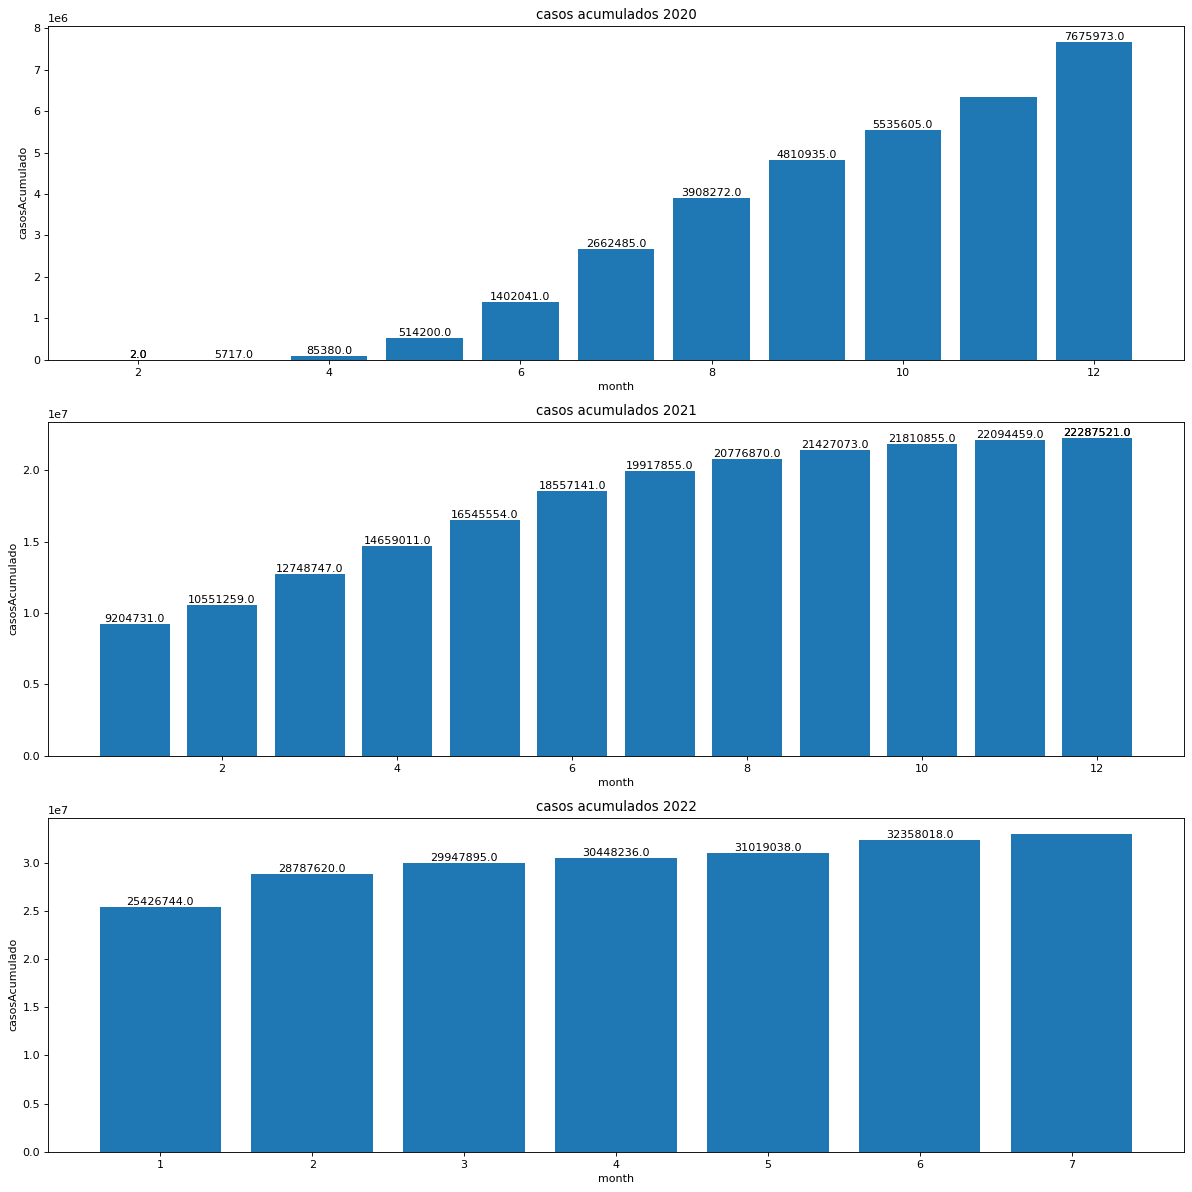

In [ ]:
plt.figure(figsize=(15, 15), dpi=80)
plt.subplot(3,1,1)
plot = plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('casosAcumulado')
# adicionando rótulo de dados ao gráfico
for i in range(10):
  plt.text(x[i], y[i], y[i], ha='center', va='bottom')
plt.text(12,max(y, key=int), max(y, key=int), ha='center', va='bottom')
plt.title('casos acumulados 2020')
#2021
plt.subplot(3,1,2)
plot = plt.bar(x1, y1)
plt.xlabel('month')
plt.ylabel('casosAcumulado')
for i in range(12):
  plt.text(x1[i], y1[i], y1[i], ha='center', va='bottom')
plt.text(12,max(y1, key=int), max(y1, key=int), ha='center', va='bottom')
plt.title('casos acumulados 2021')
#2022
plt.subplot(3,1,3)
plot = plt.bar(x2, y2)
plt.xlabel('month')
plt.ylabel('casosAcumulado')
for i in range(6):
  plt.text(x2[i], y2[i], y2[i], ha='center', va='bottom')
plt.title('casos acumulados 2022')
plt.tight_layout()
plt.show();

Proporção de casos por região
---


In [ ]:
df_covidregiao = df_covid[['regiao', 'casosNovos']].groupby(['regiao']).sum()
df_covidregiao = df_covidregiao.drop(index='Brasil')

In [ ]:
df_covidregiao.index

Index(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'], dtype='object', name='regiao')

In [ ]:
dfOrdenado = df_covidregiao.sort_values(by='casosNovos', ascending=False)
dfOrdenado.head()

,casosNovos
regiao,
Sudeste,26168388
Sul,14104232
Nordeste,13087372
Centro-Oeste,7437608
Norte,5211510


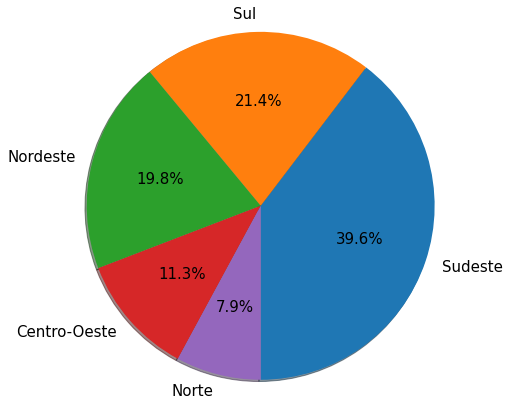

In [ ]:
valores = dfOrdenado['casosNovos'].values.tolist()
etiquetas = dfOrdenado.index.tolist()
plt.pie(valores, labels=etiquetas, autopct="%1.1f%%", shadow=True, radius=2, textprops={'size': '15'}, startangle=270)
plt.show()

Desvio padrão

In [ ]:
df_covid1 = df_covid

In [ ]:
df_covid1['i'] = 1

In [ ]:
dfcovidAgpData2 = df_covid1[['data', 'casosNovos']]
dfcovidAgpData2['data'] = pd.to_datetime(dfcovidAgpData2['data']).dt.date
dfcovidAgpData2.head(600)

,data,casosNovos
0,2020-02-25,0
1,2020-02-26,1
2,2020-02-27,0
3,2020-02-28,0
4,2020-02-29,1
...,...,...
595,2020-06-25,503
596,2020-06-26,953
597,2020-06-27,802
598,2020-06-28,627


In [ ]:
dfcovidAgpData2 = dfcovidAgpData2.loc[dfcovidAgpData2['casosNovos'] > 0]

In [ ]:
dfcovidAgpData2.loc[dfcovidAgpData2['casosNovos'] > 70000]

,data,casosNovos
714618,2020-12-16,70574
1574194,2021-01-07,87843
1574249,2021-03-03,71704
1574250,2021-03-04,75102
1574251,2021-03-05,75495
...,...,...
4642162,2022-07-01,76045
4642166,2022-07-05,74591
4642167,2022-07-06,77166
4642168,2022-07-07,72050


In [ ]:
dfcovidAgpData = dfcovidAgpData2.sort_values(by=['data'])
x = dfcovidAgpData['data'].values.tolist()
y = dfcovidAgpData['casosNovos'].values.tolist()

Texto

In [ ]:
dfcovidAgpData.dtypes

data          object
casosNovos     int64
dtype: object

In [ ]:
mediamoveldfcovidAgpData = dfcovidAgpData.rolling(window=14, min_periods=1, center=True, on='data').mean()
xm = mediamoveldfcovidAgpData['data'].values.tolist()
ym = mediamoveldfcovidAgpData['casosNovos'].values.tolist()

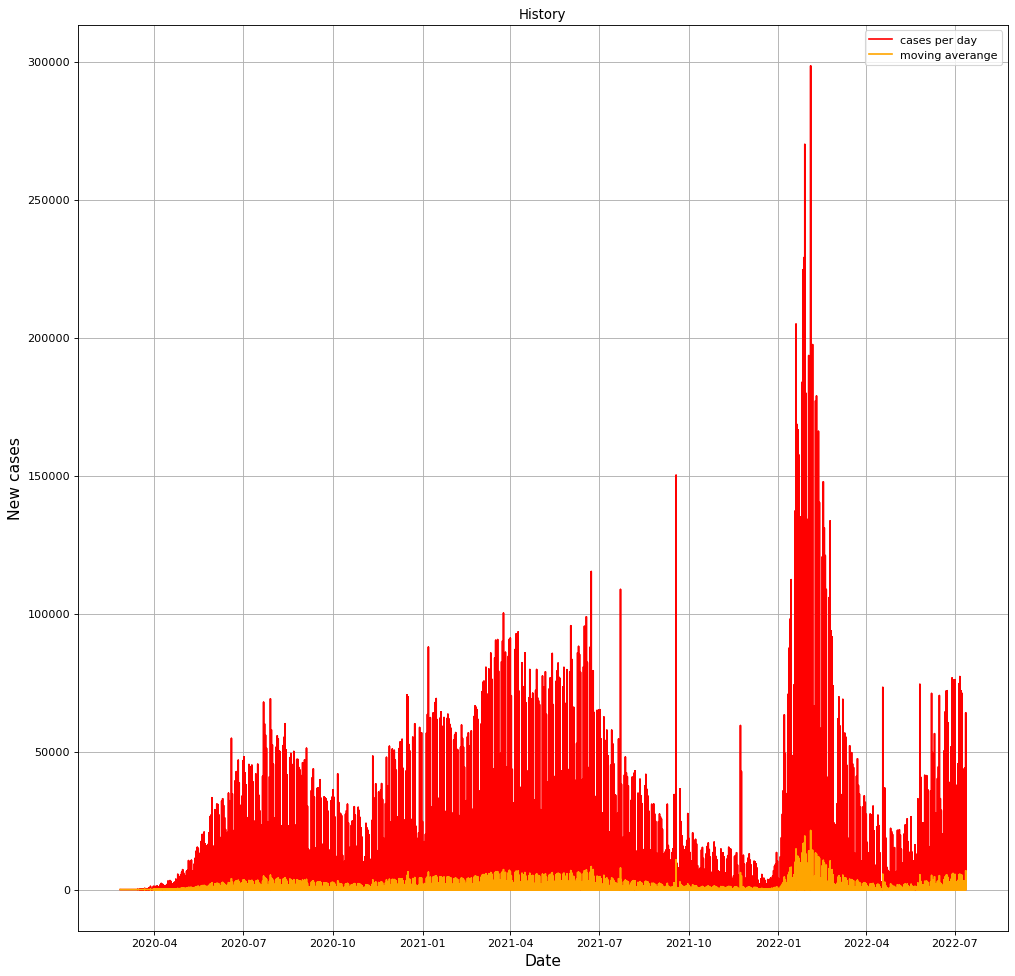

In [ ]:
plt.figure(figsize=(15, 15), dpi=80)
plt.plot(x, y, color='red', label='cases per day')
plt.plot(x, ym, color='orange', label='moving averange')
plt.title('History')
plt.xlabel('Date', fontsize=14)
plt.ylabel('New cases', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pd.options.mode.chained_assignment = None
dfAnalise = dfcovidAgpData
dfAnalise['data']= pd.to_datetime(dfAnalise['data'])

dfAnalise['year'] = dfAnalise['data'].dt.year
dfAnalise['month']= dfAnalise['data'].dt.month

In [ ]:
lastDate = dfAnalise['data'].max()
print(lastDate)
lastDate = str(lastDate)
lastMonth = int(lastDate[5:7])
lastYear = int(lastDate[0:4])
lastDay = int(lastDate[8:10])
print("Last year: ", lastYear)
print("Last month: ", lastMonth)
print("Last day: ", lastDay)

2022-07-12 00:00:00
Last year:  2022
Last month:  7
Last day:  12


In [ ]:
lastMonthAnalise = dfAnalise[dfAnalise['year'] == 2022]
lastMonthAnalise = lastMonthAnalise[lastMonthAnalise['month'] == lastMonth-1]

In [ ]:
listaValLastMonth = lastMonthAnalise['casosNovos'].values.tolist()

In [ ]:
mediaUltimoMes = sum(listaValLastMonth) / len(listaValLastMonth)
print(mediaUltimoMes)

73.14490935209936


In [ ]:
lastMediaMovel = mediamoveldfcovidAgpData

lastMediaMovel['data']= pd.to_datetime(lastMediaMovel['data'])

lastMediaMovel['year'] = lastMediaMovel['data'].dt.year
lastMediaMovel['month']= lastMediaMovel['data'].dt.month
lastMediaMovel['day']= lastMediaMovel['data'].dt.day

In [ ]:
lastMediaMovel = lastMediaMovel[lastMediaMovel['year'] == 2022]
lastMediaMovel = lastMediaMovel[lastMediaMovel['month'] == lastMonth]
lastMediaMovel = lastMediaMovel[lastMediaMovel['day'] == lastMonth]

lastMediaMovel.head()

,data,casosNovos,year,month,day
4689616,2022-07-07,56.571429,2022,7,7
4654804,2022-07-07,20.571429,2022,7,7
4680904,2022-07-07,8.571429,2022,7,7
4646992,2022-07-07,9.857143,2022,7,7
4687984,2022-07-07,9.500000,2022,7,7


In [ ]:
dfLast = lastMediaMovel[['data', 'casosNovos']]
dfLastMediaMovel = dfLast.groupby(['data']).mean()
dfLastMediaMovel.head()
lastMediaMLista = dfLastMediaMovel['casosNovos'].values.tolist()
lastMm = lastMediaMLista[0]
print(lastMm)

71.57201967182105


In [ ]:
percMediaMovel = lastMm/mediaUltimoMes
print(f'{percMediaMovel*100:.2f}')
percMediaMovel = f'{percMediaMovel*100:.2f}'
percMediaMovel = float(percMediaMovel)
print(f'Informação!! Os casos recentes de Covid-19 estão a {percMediaMovel} % do mês anterior')

97.85
Informação!! Os casos recentes de Covid-19 estão a 97.85 do mês anterior


In [ ]:
emailFrom = 'limasrodrigowk@gmail.com'
emailTo = 'limasrodrigowk@gmail.com'
senha =
def enviar_email():
    corpoEmail = f'Informação!! Os casos recentes de Covid-19 estão a {percMediaMovel}% do mês anterior'
    msg = emassege.Message()
    msg['Subject'] = "Covid19"
    msg['From'] = emailFrom
    msg['To'] = emailTo
    msg.add_header('Content-Type', 'text/html')
    msg.set_payload(corpoEmail)

    s = smtplib.SMTP('smtp.gmail.com: 587')
    s.starttls()
    s.login(msg['From'], senha)
    s.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
    print('Email enviado')

enviar_email()

Email enviado
